In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

In [2]:
#reading data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
print(train_df.shape)
train_df.head()

(7613, 5)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
print(test_df.shape)
test_df.head()

(3263, 4)


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:
test_df.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

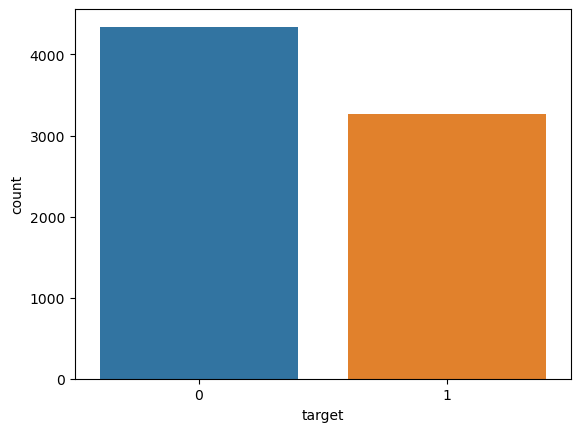

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='target', data = train_df)

In [8]:
import nltk

In [9]:
text = list(train_df['text'])

In [10]:
import re

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [11]:
corpus = []

for i in range(len(text)):

    r = re.sub('[^a-zA-Z]', ' ', text[i])

    r = r.lower()

    r = r.split()

    r = [word for word in r if word not in stopwords.words('english')]

    r = [lemmatizer.lemmatize(word) for word in r]

    r = ' '.join(r)

    corpus.append(r)

train_df['text'] = corpus
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deed reason earthquake may allah forgive u,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,resident asked shelter place notified officer ...,1
3,6,NaN,NaN,people receive wildfire evacuation order calif...,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfire pour...,1


In [12]:
train_df['keyword'] = train_df['keyword'].replace(np.nan, '')
train_df['location'] = train_df['location'].replace(np.nan, '')

In [13]:
train_X_text = train_df['text']
train_X_keyword = train_df['keyword']
train_X_location = train_df['location']
train_Y = train_df['target']

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

cv_text = CountVectorizer(stop_words='english').fit(train_X_text)

train_X_text_df = pd.DataFrame(cv_text.transform(train_X_text).todense(), columns = cv_text.get_feature_names())

train_X_text_df.shape

/Users/ruchithakor/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(7613, 20509)

In [15]:
cv_keyword = CountVectorizer(stop_words='english').fit(train_X_keyword)

train_X_keyword_df = pd.DataFrame(cv_keyword.transform(train_X_keyword).todense(), columns = cv_keyword.get_feature_names())

train_X_keyword_df.shape

/Users/ruchithakor/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(7613, 237)

In [16]:
cv_location = CountVectorizer(stop_words='english').fit(train_X_location)

train_X_location_df = pd.DataFrame(cv_location.transform(train_X_location).todense(), columns = cv_location.get_feature_names())

train_X_location_df.shape

/Users/ruchithakor/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(7613, 3135)

In [17]:
# train = pd.concat([train_X_text_df,train_X_keyword_df,train_X_location_df], axis = 1)
train = pd.concat([train_X_text_df], axis = 1)

In [18]:
train['target'] = train_Y

In [19]:
#train & validation split
from sklearn.model_selection import train_test_split

# Divide the training data in validation and training sets
t1, val = train_test_split(train, test_size=0.2, random_state=31)

In [20]:
t1.shape

(6090, 20509)

In [21]:
val.shape

(1523, 20509)

In [22]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

t1_feature = t1.drop(['target'], axis=1)

lr.fit(t1_feature, t1['target'])

val_features = val.drop(['target'], axis=1)

val_pred = lr.predict(val_features)

# Confusion matrix
from sklearn.metrics import confusion_matrix
print(pd.DataFrame(confusion_matrix(val['target'], val_pred)))

from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(val['target'], val_pred)
print("Accuracy:", accuracy)

# Printing the classification report
report = classification_report(val['target'], val_pred)
print(report)

     0    1
0  750  104
1  193  476
Accuracy: 0.8049901510177282
              precision    recall  f1-score   support

           0       0.80      0.88      0.83       854
           1       0.82      0.71      0.76       669

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.80      1523
weighted avg       0.81      0.80      0.80      1523



In [23]:
#SVM
from sklearn.svm import SVC

# Training the SVM model
svm = SVC()
svm.fit(t1_feature, t1['target'])

SVC()

In [24]:
val_svm_pred = svm.predict(val_features)

# Confusion matrix
from sklearn.metrics import confusion_matrix
print(pd.DataFrame(confusion_matrix(val['target'], val_svm_pred)))

from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(val['target'], val_svm_pred)
print("Accuracy:", accuracy)

# Printing the classification report
report = classification_report(val['target'], val_svm_pred)
print(report)

     0    1
0  793   61
1  231  438
Accuracy: 0.8082731451083388
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       854
           1       0.88      0.65      0.75       669

    accuracy                           0.81      1523
   macro avg       0.83      0.79      0.80      1523
weighted avg       0.82      0.81      0.80      1523



In [39]:
t1_feature.shape

(6090, 20508)

In [25]:
test_df['keyword'] = test_df['keyword'].replace(np.nan, '')
test_df['location'] = test_df['location'].replace(np.nan, '')
test_df.head()

,id,keyword,location,text
0,0,,,Just happened a terrible car crash
1,2,,,"Heard about #earthquake is different cities, s..."
2,3,,,"there is a forest fire at spot pond, geese are..."
3,9,,,Apocalypse lighting. #Spokane #wildfires
4,11,,,Typhoon Soudelor kills 28 in China and Taiwan


In [26]:
test_df.isna().sum()

id          0
keyword     0
location    0
text        0
dtype: int64

In [27]:
test_df.shape

(3263, 4)

In [28]:
text1 = list(test_df['text'])
corpus1 = []

In [29]:
for i in range(len(text1)):

    r = re.sub('[^a-zA-Z]', ' ', text1[i])

    r = r.lower()

    r = r.split()

    r = [word for word in r if word not in stopwords.words('english')]

    r = [lemmatizer.lemmatize(word) for word in r]

    r = ' '.join(r)

    corpus1.append(r)

In [30]:
test_df['text'] = corpus1
test_df.head()

,id,keyword,location,text
0,0,,,happened terrible car crash
1,2,,,heard earthquake different city stay safe ever...
2,3,,,forest fire spot pond goose fleeing across str...
3,9,,,apocalypse lighting spokane wildfire
4,11,,,typhoon soudelor kill china taiwan


In [31]:
test_X_text = test_df['text']
test_X_keyword = test_df['keyword']
test_X_location = test_df['location']

In [32]:
test_X_text_df = pd.DataFrame(cv_text.transform(test_X_text).todense(), columns = cv_text.get_feature_names())

test_X_text_df.shape

/Users/ruchithakor/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(3263, 20509)

In [33]:
test_X_keyword_df = pd.DataFrame(cv_keyword.transform(test_X_keyword).todense(), columns = cv_keyword.get_feature_names())

test_X_keyword_df.shape

/Users/ruchithakor/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(3263, 237)

In [34]:
test_X_location_df = pd.DataFrame(cv_location.transform(test_X_location).todense(), columns = cv_location.get_feature_names())

test_X_location_df.shape

/Users/ruchithakor/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(3263, 3135)

In [ ]:
# test_X = test_df['text']

# test_X_cv = cv.transform(test_X)

# test_X_cv.shape

In [35]:
# test = pd.concat([test_X_text_df,test_X_keyword_df,test_X_location_df], axis = 1)
test = pd.concat([test_X_text_df], axis = 1)

In [38]:
test.shape

(3263, 20509)

In [41]:
test = test.drop(['target'], axis=1)
predictions_svm = svm.predict(test)

NameError: name 'predictions' is not defined

In [42]:
predictions_svm

array([1, 1, 1, ..., 1, 1, 0])

In [44]:
test_df['target'] = predictions_svm
test_df.head()

,id,keyword,location,text,target
0,0,,,happened terrible car crash,1
1,2,,,heard earthquake different city stay safe ever...,1
2,3,,,forest fire spot pond goose fleeing across str...,1
3,9,,,apocalypse lighting spokane wildfire,0
4,11,,,typhoon soudelor kill china taiwan,1


<AxesSubplot:xlabel='target', ylabel='count'>

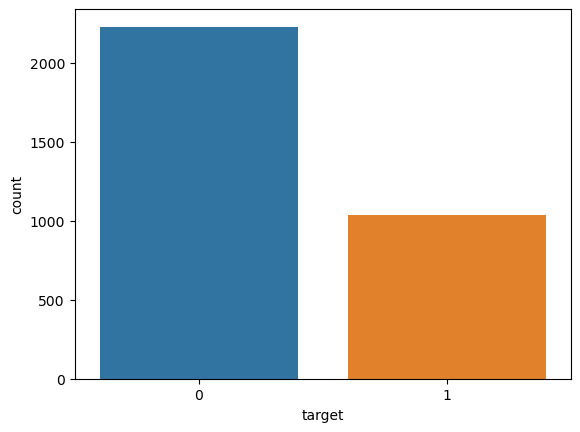

In [45]:
sns.countplot(x='target', data = test_df)

In [ ]:
test_df.to_csv("submission.csv", index=False)